In [391]:
# Loading necessary libraries
library("tidyverse")
library("caret")
library(ggthemes)
library(gridExtra)
library(patchwork)
library(MASS)
library(scales)


Dołączanie pakietu: ‘scales’


Następujący obiekt został zakryty z ‘package:purrr’:

    discard


Następujący obiekt został zakryty z ‘package:readr’:

    col_factor




In [85]:
eu_deposits <- "EU_deposits_1yr_data.csv"
eu_inflation <- "EU_Inflation_HICP_data.csv"
# Check if our data have title row and what is the delimiter
read_lines(eu_deposits, n_max = 3)
read_lines(eu_inflation, n_max = 3)


[1] "Data Source in SDW: https://sdw.ecb.europa.eu/browse.do?node=9691394"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                            
[2] ",MIR.M.AT.B.L22.F.R.A.2250.EUR.N,MIR.M.BE.B.L22.F.R.A.2250.EUR.N,MIR.M.BG.B.L22.F.R.A.2250.BGN.N,MIR.M.CY.B.L22.F.R.A.2250.EUR.N,MIR.M.CZ.B.L22.F.R.A.2250.CZK.N,MIR.M.DE.B.L22.F.R.A.2250.EUR.N,MIR.M.DK.B.L22.F.R.A.2250.DKK.N,MIR.M.EE.B.L22.F.R.A.2250.EEK.N,MIR.M.EE.B.L22.F.R.A.2250.EUR.N,MIR.M.ES.B.L22.F.R.A.2250.EUR.N,MIR.M.FI.B.L22.F.R.A.2250.EUR.N,MIR.M.FR.B.L22.F.R.A.2250.EUR.N,MIR.M.GR.B.L22.F.R.A.2250.EUR.N,MIR.M.HR.B.L22.F.R.A.2250.HRK.N,MIR.M.HU.B.L22.F.R.A.2250.HUF.N,MIR.M.IE.B.L22.F.R.A.2250.EUR.N,MIR.M.IT.B.L22.F.R.A.2250.EUR.N,MIR.M.LT.B.L22.F.R.A.2250.EUR.N,MIR.M.LT.B.L22.F.R.A.2250.LTL.N,MIR.M.LU.B.L22.F.R.A.2250.EUR.N,MIR.M.LV.B.L22.F.R.A.2250.EUR.N,MIR.M.LV.B.L22.F.R.A.2250.LVL.N,MIR.M.MT.B.L22.F.R.A.2250.EUR.N,MIR.M.MT.B.L22.F.R.A.2250.MTL.N,MIR.M.NL.B.L22.F.R.A.2250.EUR.N,MIR.M.PL.B.L22.F.R.A.2250.PLN.N,MIR.M.PT.B.L22.F.R.A.2250.EUR.N,MIR.M.RO.B.L22.F.R.A.2250.RON.N,MIR.M.SE.B.L22.F.R.A.2250.SEK.N,MIR.M.SI.B.L22.F.R.A.2250.EUR.N,MIR.M.SI.B.L22.F.R.A.2250.SIT.N,MIR.M.SK.B.L22.F.R.A.2250.EUR.N,MIR.M.SK.B.L22.F.R.A.2250.SKK.N"
[3] ",\"Austria, Euro\",\"Belgium, Euro\",\"Bulgaria, Bulgarian lev\",\"Cyprus, Euro\",\"Czech Republic, Czech koruna\",\"Germany, Euro\",\"Denmark, Danish krone\",\"Estonia, Estonian kroon\",\"Estonia, Euro\",\"Spain, Euro\",\"Finland, Euro\",\"France, Euro\",\"Greece, Euro\",\"Croatia, Croatian kuna\",\"Hungary, Hungarian forint\",\"Ireland, Euro\",\"Italy, Euro\",\"Lithuania, Euro\",\"Lithuania, Lithuanian litas\",\"Luxembourg, Euro\",\"Latvia, Euro\",\"Latvia, Latvian lats\",\"Malta, Euro\",\"Malta, Maltese lira\",\"Netherlands, Euro\",\"Poland, Polish zloty\",\"Portugal, Euro\",\"Romania, Romanian leu\",\"Sweden, Swedish krona\",\"Slovenia, Euro\",\"Slovenia, Slovenian tolar\",\"Slovakia, Euro\",\"Slovakia, Slovak koruna\""

[1] "Data Source in SDW: https://sdw.ecb.europa.eu/browseChart.do?org.apache.struts.taglib.html.TOKEN=46c52daef2587d98a7880dbacfe169eb&df=true&ec=&dc=&oc=&pb=&rc=&DATASET=0&removeItem=&removedItemList=&mergeFilter=&activeTab=ICP&showHide=&REF_AREA.19=AT&REF_AREA.19=BE&REF_AREA.19=BG&REF_AREA.19=CY&REF_AREA.19=CZ&REF_AREA.19=D0&REF_AREA.19=DE&REF_AREA.19=DK&REF_AREA.19=EE&REF_AREA.19=ES&REF_AREA.19=FI&REF_AREA.19=FR&REF_AREA.19=GR&REF_AREA.19=HR&REF_AREA.19=HU&REF_AREA.19=IE&REF_AREA.19=IT&REF_AREA.19=LT&REF_AREA.19=LU&REF_AREA.19=LV&REF_AREA.19=MT&REF_AREA.19=NL&REF_AREA.19=PL&REF_AREA.19=PT&REF_AREA.19=RO&REF_AREA.19=SE&REF_AREA.19=SI&REF_AREA.19=SK&ICP_ITEM.19=000000&ICP_SUFFIX.19=ANR&MAX_DOWNLOAD_SERIES=500&SERIES_MAX_NUM=50&node=9691209&legendRef=reference&legendNor=&SERIES_KEY_checkall=on&SERIES_KEY=122.ICP.M.BG.N.000000.4.ANR&SERIES_KEY=122.ICP.M.CZ.N.000000.4.ANR&SERIES_KEY=122.ICP.M.DK.N.000000.4.ANR&SERIES_KEY=122.ICP.M.HR.N.000000.4.ANR&SERIES_KEY=122.ICP.M.HU.N.000000.4.ANR&SERIES_KEY=122.ICP.M.PL.N.000000.4.ANR&SERIES_KEY=122.ICP.M.RO.N.000000.4.ANR&SERIES_KEY=122.ICP.M.SE.N.000000.4.ANR&SERIES_KEY=122.ICP.M.AT.N.000000.4.ANR&SERIES_KEY=122.ICP.M.BE.N.000000.4.ANR&SERIES_KEY=122.ICP.M.CY.N.000000.4.ANR&SERIES_KEY=122.ICP.M.D0.N.000000.4.ANR&SERIES_KEY=122.ICP.M.DE.N.000000.4.ANR&SERIES_KEY=122.ICP.M.EE.N.000000.4.ANR&SERIES_KEY=122.ICP.M.ES.N.000000.4.ANR&SERIES_KEY=122.ICP.M.FI.N.000000.4.ANR&SERIES_KEY=122.ICP.M.FR.N.000000.4.ANR&SERIES_KEY=122.ICP.M.GR.N.000000.4.ANR&SERIES_KEY=122.ICP.M.IE.N.000000.4.ANR&SERIES_KEY=122.ICP.M.IT.N.000000.4.ANR&SERIES_KEY=122.ICP.M.LT.N.000000.4.ANR&SERIES_KEY=122.ICP.M.LU.N.000000.4.ANR&SERIES_KEY=122.ICP.M.LV.N.000000.4.ANR&SERIES_KEY=122.ICP.M.MT.N.000000.4.ANR&SERIES_KEY=122.ICP.M.NL.N.000000.4.ANR&SERIES_KEY=122.ICP.M.PT.N.000000.4.ANR&SERIES_KEY=122.ICP.M.SI.N.000000.4.ANR&SERIES_KEY=122.ICP.M.SK.N.000000.4.ANR"
[2] ",ICP.M.AT.N.000000.4.ANR,ICP.M.BE.N.000000.4.ANR,ICP.M.BG.N.000000.4.ANR,ICP.M.CY.N.000000.4.ANR,ICP.M.CZ.N.000000.4.ANR,ICP.M.D0.N.000000.4.ANR,ICP.M.DE.N.000000.4.ANR,ICP.M.DK.N.000000.4.ANR,ICP.M.EE.N.000000.4.ANR,ICP.M.ES.N.000000.4.ANR,ICP.M.FI.N.000000.4.ANR,ICP.M.FR.N.000000.4.ANR,ICP.M.GR.N.000000.4.ANR,ICP.M.HR.N.000000.4.ANR,ICP.M.HU.N.000000.4.ANR,ICP.M.IE.N.000000.4.ANR,ICP.M.IT.N.000000.4.ANR,ICP.M.LT.N.000000.4.ANR,ICP.M.LU.N.000000.4.ANR,ICP.M.LV.N.000000.4.ANR,ICP.M.MT.N.000000.4.ANR,ICP.M.NL.N.000000.4.ANR,ICP.M.PL.N.000000.4.ANR,ICP.M.PT.N.000000.4.ANR,ICP.M.RO.N.000000.4.ANR,ICP.M.SE.N.000000.4.ANR,ICP.M.SI.N.000000.4.ANR,ICP.M.SK.N.000000.4.ANR"                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                   
[3] ",Austria,Belgium,Bulgaria,Cyprus,Czech Republic,EU (changing composition),Germany,Denmark,Estonia,Spain,Finland,France,Greece,Croatia,Hungary,Ireland,Italy,Lithuania,Luxembourg,Latvia,Malta,Netherlan

In [86]:
eu_deposits_data <- read_csv(eu_deposits, skip=2)
colnames(eu_deposits_data) <- make.names(colnames(eu_deposits_data))
colnames(eu_deposits_data)[1] <- "Date"
eu_inflation_data <- read_csv(eu_inflation, skip=2)
colnames(eu_inflation_data) <- make.names(colnames(eu_inflation_data))
colnames(eu_inflation_data)[1] <- "Date"

New names:
• `` -> `...1`
Rows: 515 Columns: 34
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (34): ...1, Austria, Euro, Belgium, Euro, Bulgaria, Bulgarian lev, Cypru...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.
New names:
• `` -> `...1`
Rows: 420 Columns: 29
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (29): ...1, Austria, Belgium, Bulgaria, Cyprus, Czech Republic, EU (chan...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [87]:
eu_deposits_data <- eu_deposits_data[c(-1, -2), ]
head(eu_deposits_data)

Date,Austria..Euro,Belgium..Euro,Bulgaria..Bulgarian.lev,Cyprus..Euro,Czech.Republic..Czech.koruna,Germany..Euro,Denmark..Danish.krone,Estonia..Estonian.kroon,Estonia..Euro,⋯,Malta..Maltese.lira,Netherlands..Euro,Poland..Polish.zloty,Portugal..Euro,Romania..Romanian.leu,Sweden..Swedish.krona,Slovenia..Euro,Slovenia..Slovenian.tolar,Slovakia..Euro,Slovakia..Slovak.koruna
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
2022Sep,0.80,0.84,0.12,0.11,6.10,0.84,1.15,NA,0.94,⋯,NA,1.84,5.44,0.05,6.44,1.65,0.11,NA,0.77,NA
2022Aug,0.37,0.37,0.11,0.06,5.98,0.49,0.25,NA,0.83,⋯,NA,1.53,5.22,0.07,6.22,1.21,0.04,NA,0.48,NA
2022Jul,0.23,0.11,0.09,0.05,5.95,0.31,-0.44,NA,0.59,⋯,NA,1.59,4.85,0.09,5.49,0.90,0.03,NA,0.21,NA
2022Jun,0.12,0.14,0.06,0.05,5.37,0.17,-0.45,NA,0.49,⋯,NA,1.47,4.50,0.07,4.37,0.53,0.03,NA,0.16,NA
2022May,0.08,0.07,0.04,0.05,4.53,0.14,-0.50,NA,0.50,⋯,NA,1.23,3.38,0.04,3.21,0.38,0.04,NA,0.21,NA
2022Apr,0.10,0.06,0.04,0.05,4.17,0.14,-0.51,NA,0.44,⋯,NA,1.15,2.03,0.04,2.56,0.32,0.03,NA,0.24,NA


In [88]:
eu_inflation_data <- eu_inflation_data[c(-1, -2), ]
head(eu_inflation_data)

Date,Austria,Belgium,Bulgaria,Cyprus,Czech.Republic,EU..changing.composition.,Germany,Denmark,Estonia,⋯,Luxembourg,Latvia,Malta,Netherlands,Poland,Portugal,Romania,Sweden,Slovenia,Slovakia
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,⋯,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
2022Oct,11.5,13.1,NA,8.6,NA,NA,11.6,NA,22.4,⋯,8.8,21.8,7.5,16.8,NA,10.6,NA,NA,10.3,14.5
2022Sep,10.9,12.1,15.6,9.0,17.8,10.9,10.9,11.1,24.1,⋯,8.8,22.0,7.4,17.1,15.7,9.8,13.4,10.3,10.6,13.6
2022Aug,9.3,10.5,15.0,9.6,17.1,10.1,8.8,9.9,25.2,⋯,8.6,21.4,7.0,13.7,14.8,9.3,13.3,9.5,11.5,13.4
2022Jul,9.4,10.4,14.9,10.6,17.3,9.8,8.5,9.6,23.2,⋯,9.3,21.3,6.8,11.6,14.2,9.4,13.0,8.3,11.7,12.8
2022Jun,8.7,10.5,14.8,9.0,16.6,9.6,8.2,9.1,22.0,⋯,10.3,19.2,6.1,9.9,14.2,9.0,13.0,8.9,10.8,12.6
2022May,7.7,9.9,13.4,8.8,15.2,8.8,8.7,8.2,20.1,⋯,9.1,16.8,5.8,10.2,12.8,8.1,12.4,7.5,8.7,11.8


In [89]:
# converting wide data into tidy data
eu_deposits_data <- eu_deposits_data |> pivot_longer(-Date, names_to = "country", values_to = "deposits")
eu_inflation_data <- eu_inflation_data |> pivot_longer(-Date, names_to = "country", values_to = "inflation")

In [90]:
# Getting more information about the structure of data objects
str(eu_deposits_data)
str(eu_inflation_data)

tibble [16,929 × 3] (S3: tbl_df/tbl/data.frame)
 $ Date    : chr [1:16929] "2022Sep" "2022Sep" "2022Sep" "2022Sep" ...
 $ country : chr [1:16929] "Austria..Euro" "Belgium..Euro" "Bulgaria..Bulgarian.lev" "Cyprus..Euro" ...
 $ deposits: chr [1:16929] "0.80" "0.84" "0.12" "0.11" ...
tibble [11,704 × 3] (S3: tbl_df/tbl/data.frame)
 $ Date     : chr [1:11704] "2022Oct" "2022Oct" "2022Oct" "2022Oct" ...
 $ country  : chr [1:11704] "Austria" "Belgium" "Bulgaria" "Cyprus" ...
 $ inflation: chr [1:11704] "11.5" "13.1" NA "8.6" ...


In [91]:
head(eu_deposits_data)
head(eu_inflation_data)

Date,country,deposits
<chr>,<chr>,<chr>
2022Sep,Austria..Euro,0.80
2022Sep,Belgium..Euro,0.84
2022Sep,Bulgaria..Bulgarian.lev,0.12
2022Sep,Cyprus..Euro,0.11
2022Sep,Czech.Republic..Czech.koruna,6.10
2022Sep,Germany..Euro,0.84


Date,country,inflation
<chr>,<chr>,<chr>
2022Oct,Austria,11.5
2022Oct,Belgium,13.1
2022Oct,Bulgaria,NA
2022Oct,Cyprus,8.6
2022Oct,Czech.Republic,NA
2022Oct,EU..changing.composition.,NA


In [92]:
eu_inflation_data <- eu_inflation_data |> filter(country != 'EU..changing.composition.')
head(eu_inflation_data)

Date,country,inflation
<chr>,<chr>,<chr>
2022Oct,Austria,11.5
2022Oct,Belgium,13.1
2022Oct,Bulgaria,NA
2022Oct,Cyprus,8.6
2022Oct,Czech.Republic,NA
2022Oct,Germany,11.6


In [93]:
# Checking if columns of our data have any missing values
apply(eu_deposits_data, 2, function(col) sum(is.na(col)))
apply(eu_inflation_data, 2, function(col) sum(is.na(col)))

Date  country deposits 
       0        0    10080

Date   country inflation 
        0         0      2719

In [94]:
substring <- "Euro"
euro_zone <- eu_deposits_data[grepl(substring, eu_deposits_data$country, fixed=TRUE),]

In [95]:
head(euro_zone)

Date,country,deposits
<chr>,<chr>,<chr>
2022Sep,Austria..Euro,0.80
2022Sep,Belgium..Euro,0.84
2022Sep,Cyprus..Euro,0.11
2022Sep,Germany..Euro,0.84
2022Sep,Estonia..Euro,0.94
2022Sep,Spain..Euro,0.16


In [96]:
euro_zone <- substring(euro_zone$country, 1, nchar(euro_zone$country)-6)

In [97]:
euro_zone <- unique(euro_zone)
euro_zone

[1] "Austria"     "Belgium"     "Cyprus"      "Germany"     "Estonia"    
 [6] "Spain"       "Finland"     "France"      "Greece"      "Ireland"    
[11] "Italy"       "Lithuania"   "Luxembourg"  "Latvia"      "Malta"      
[16] "Netherlands" "Portugal"    "Slovenia"    "Slovakia"

In [98]:
eu_inflation <- eu_inflation_data %>% mutate(euro = as.factor(if_else(country %in% euro_zone, 'Euro', 'Other')), isPoland = as.factor(if_else(country == 'Poland', 'Poland', 'Rest')))
head(eu_inflation)

Date,country,inflation,euro,isPoland
<chr>,<chr>,<chr>,<fct>,<fct>
2022Oct,Austria,11.5,Euro,Rest
2022Oct,Belgium,13.1,Euro,Rest
2022Oct,Bulgaria,NA,Other,Rest
2022Oct,Cyprus,8.6,Euro,Rest
2022Oct,Czech.Republic,NA,Other,Rest
2022Oct,Germany,11.6,Euro,Rest


In [99]:
eu_inflation <- eu_inflation|> mutate(country = as.factor(country))

In [100]:
pandemic <- "2020Mar"
year_pandemic <- "2021Mar"
attack_on_ukraine <- "2022Mar"
now <- "2022Sep"

In [155]:
#split data into time intervals
n = sum(eu_inflation$Date == pandemic)
pre_pandemic_inf<- eu_inflation[which(eu_inflation$Date == "2018Jan")[n]:which(eu_inflation$Date == pandemic)[1], ]
year_pandemic_inf <- eu_inflation[which(eu_inflation$Date == pandemic)[n]:which(eu_inflation$Date == year_pandemic)[1], ]
pre_attack_inf <- eu_inflation[which(eu_inflation$Date == year_pandemic)[n]:which(eu_inflation$Date == attack_on_ukraine)[1], ]
after_attack_inf <- eu_inflation[which(eu_inflation$Date == attack_on_ukraine)[n]:which(eu_inflation$Date == now)[1], ]

In [156]:
pre_pandemic_inf <- pre_pandemic_inf |> mutate(Date = factor(Date, levels = unique(Date)), inflation = as.numeric(inflation))
year_pandemic_inf <- year_pandemic_inf |> mutate(Date = factor(Date, levels = unique(Date)), inflation = as.numeric(inflation))
pre_attack_inf <- pre_attack_inf |> mutate(Date = factor(Date, levels = unique(Date)), inflation = as.numeric(inflation))
after_attack_inf <- after_attack_inf |> mutate(Date = factor(Date, levels = unique(Date)), inflation = as.numeric(inflation))

In [157]:
head(pre_pandemic_inf)

Date,country,inflation,euro,isPoland
<fct>,<fct>,<dbl>,<fct>,<fct>
2018Jan,Slovakia,2.6,Euro,Rest
2018Jan,Slovenia,1.7,Euro,Rest
2018Jan,Sweden,1.6,Other,Rest
2018Jan,Romania,3.4,Other,Rest
2018Jan,Portugal,1.1,Euro,Rest
2018Jan,Poland,1.6,Other,Poland


In [440]:
plot_inf_mean <- function(data) {
    options(repr.plot.width=12, repr.plot.height=6)
    breaks <- levels(data$Date)[seq_along(levels(data$Date)) %% 2 == 1]
    concrete_country <- data |> filter(country == 'Poland')
    data_mean <- data |> group_by(euro, Date) |> summarize(mean = mean(inflation), .groups="drop")
    plot <- ggplot(NULL) +
    geom_line(data = data_mean, aes(Date, mean, group=euro, color=euro), size=2)+
    geom_line(data = concrete_country, aes(Date, inflation,group=1, color=country), size=2) +
    scale_x_discrete(breaks = breaks) +
    theme_economist() + xlab("Date") + ylab("Inflation") + 
    theme(axis.text.x = element_text(angle = 60, vjust = 1, hjust = 1))
    return (plot)
}

In [441]:
plot_inf <- function(data) {
    options(repr.plot.width=12, repr.plot.height=8)
    breaks <- levels(data$Date)[seq_along(levels(data$Date)) %% 2 == 1]
plot <- data |> 
ggplot(aes(Date,
           inflation,
           group = country)) + 
geom_line(aes(color = country), size=2) + geom_text(data=subset(data,
                                                                country == "Poland"),
                                                    aes(label=country), check_overlap = TRUE) +
scale_x_discrete(breaks = breaks) +
facet_grid(. ~ euro) + theme_economist() +
xlab("Date") + ylab("Inflation") + theme(axis.text.x = element_text(angle = 60, vjust = 1, hjust = 1))
    return (plot)
}

In [418]:
boxplot_inf <- function(data){
concrete_country <- data |> filter(country == "Poland") 
options(repr.plot.width=12, repr.plot.height=6)
  ggplot(NULL) +
  geom_boxplot(data = data, aes(euro, inflation,fill=euro)) + 
  geom_boxplot(data = concrete_country, aes(country, inflation, fill=country)) +
  xlab("") + ylab("inflation") + 
theme_economist()
    }

In [419]:
a <- pre_pandemic_inf |> filter(euro == 'Other') |> summary()
a[,3]

"Min.   :0.300  " "1st Qu.:1.300  " "Median :2.100  " "Mean   :2.226  " 
                                                      
"3rd Qu.:3.125  " "Max.   :4.700  "                NA

In [420]:
a <- pre_pandemic_inf |> filter(euro == 'Euro') |> summary()
a[,3]

"Min.   :-1.500  " "1st Qu.: 1.000  " "Median : 1.600  " "Mean   : 1.599  " 
                                                         
"3rd Qu.: 2.200  " "Max.   : 4.500  "                 NA

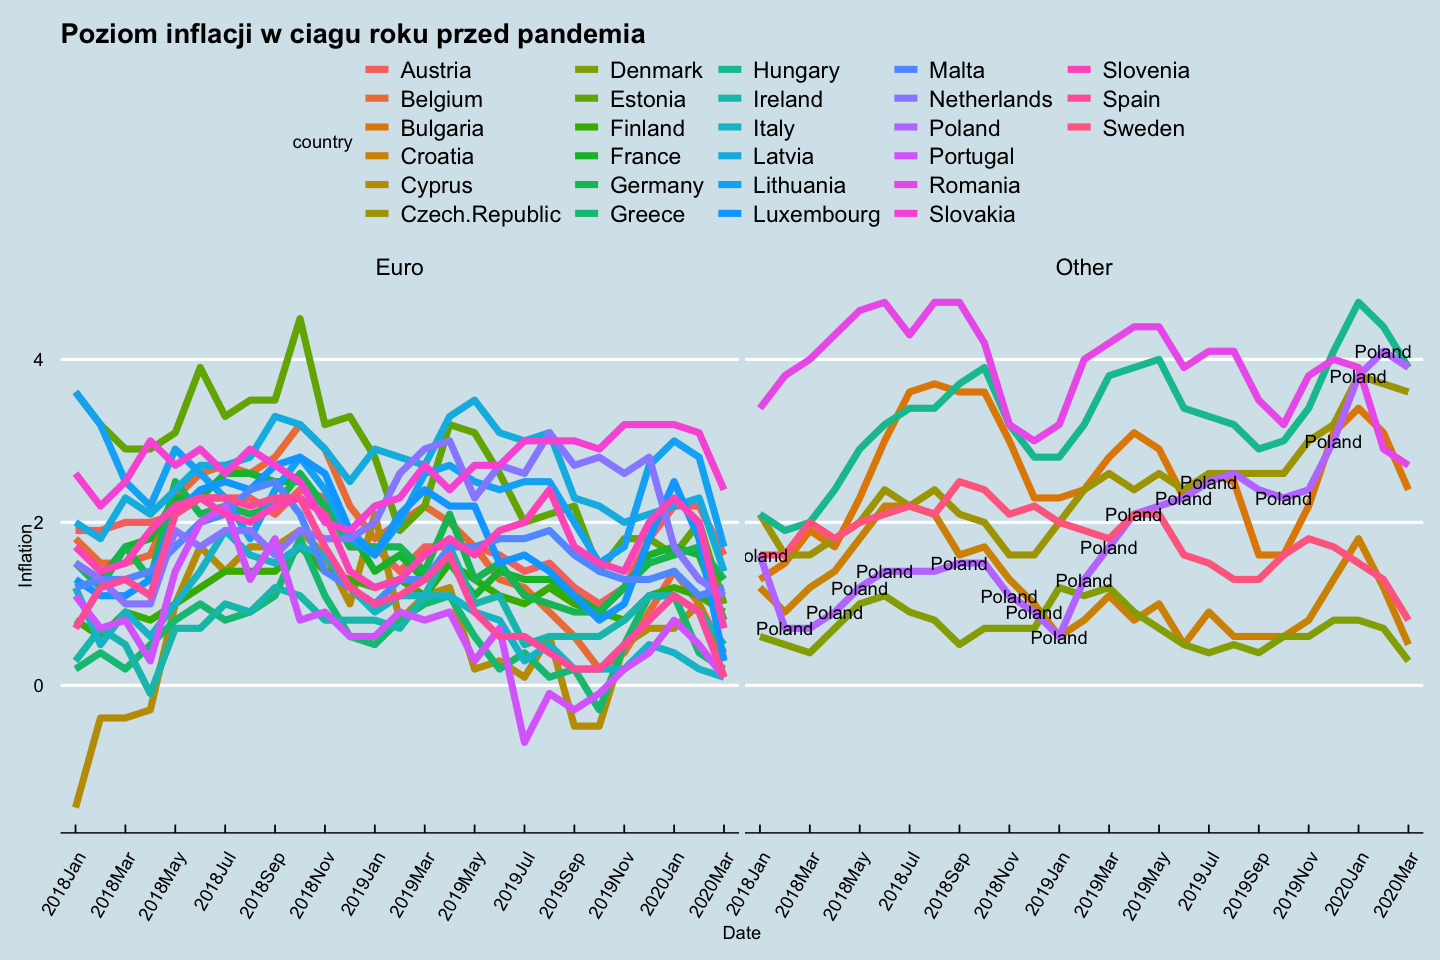

In [442]:
plot_inf(pre_pandemic_inf) + 
ggtitle("Poziom inflacji w ciagu roku przed pandemia")

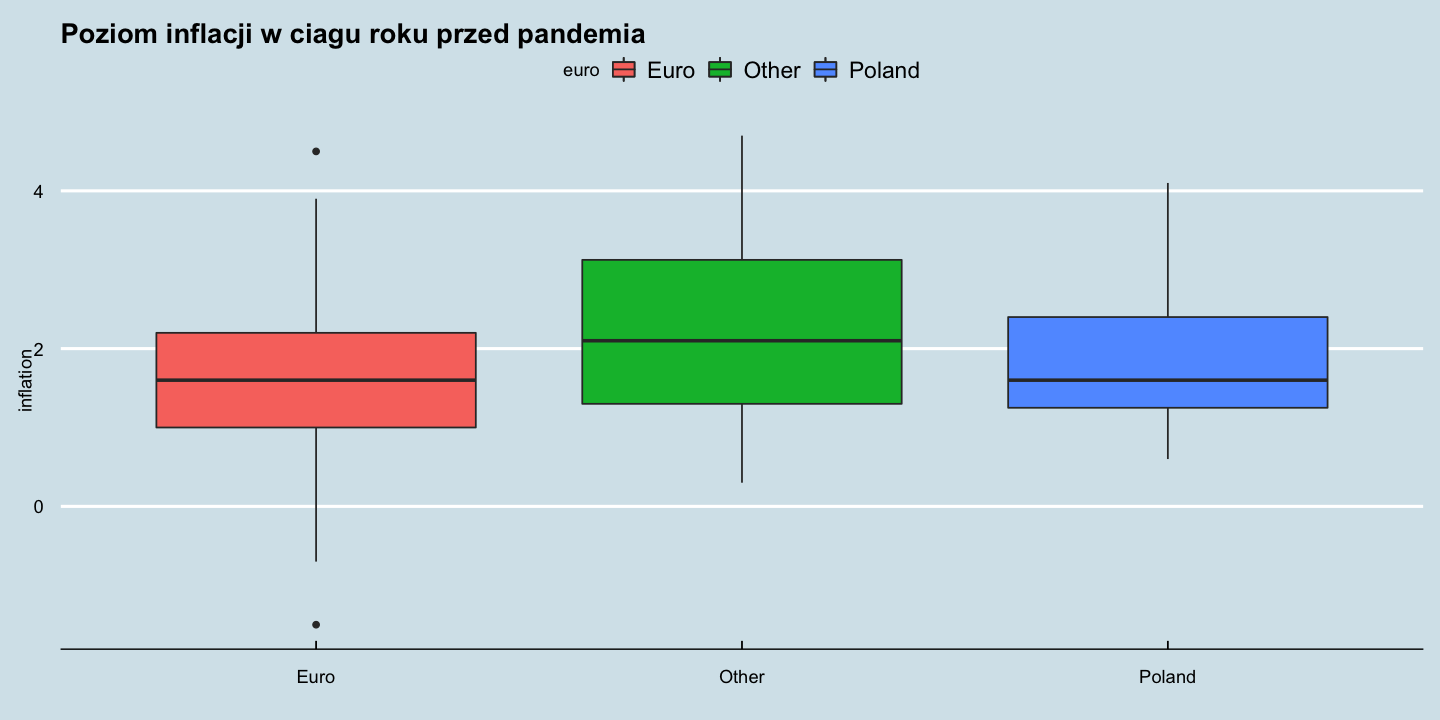

In [443]:
boxplot_inf(pre_pandemic_inf)+ 
ggtitle("Poziom inflacji w ciagu roku przed pandemia")

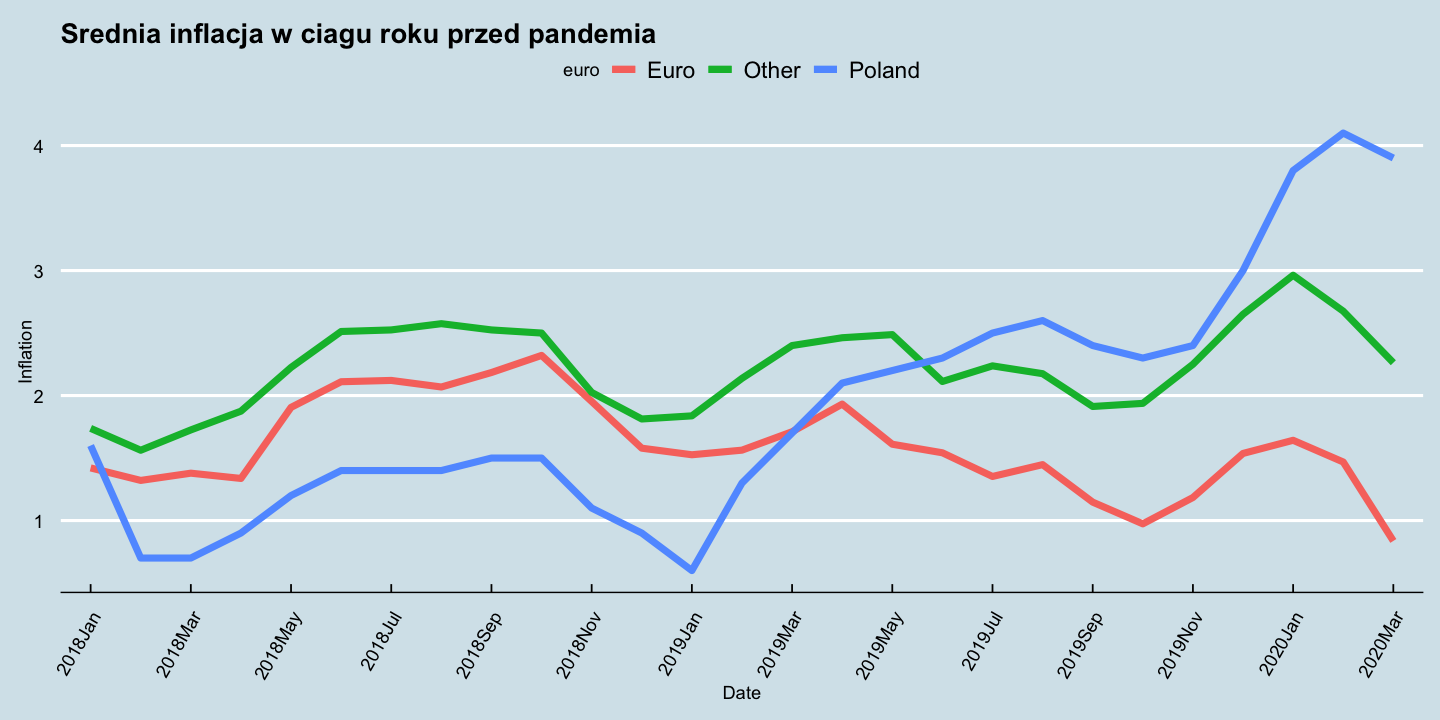

In [444]:
plot_inf_mean(pre_pandemic_inf)+ 
ggtitle("Srednia inflacja w ciagu roku przed pandemia")

In [445]:
a <- year_pandemic_inf |> filter(euro == 'Other') |> summary()
a[,3]

"Min.   :-0.700  " "1st Qu.: 0.400  " "Median : 1.800  " "Mean   : 1.731  " 
                                                         
"3rd Qu.: 2.925  " "Max.   : 4.400  "                 NA

In [446]:
a <- year_pandemic_inf |> filter(euro == 'Euro') |> summary()
a[,3]

"Min.   :-2.90000  " "1st Qu.:-0.70000  " "Median : 0.10000  " 
                                                               
"Mean   : 0.06802  " "3rd Qu.: 0.90000  " "Max.   : 2.50000  " 
                     
                  NA

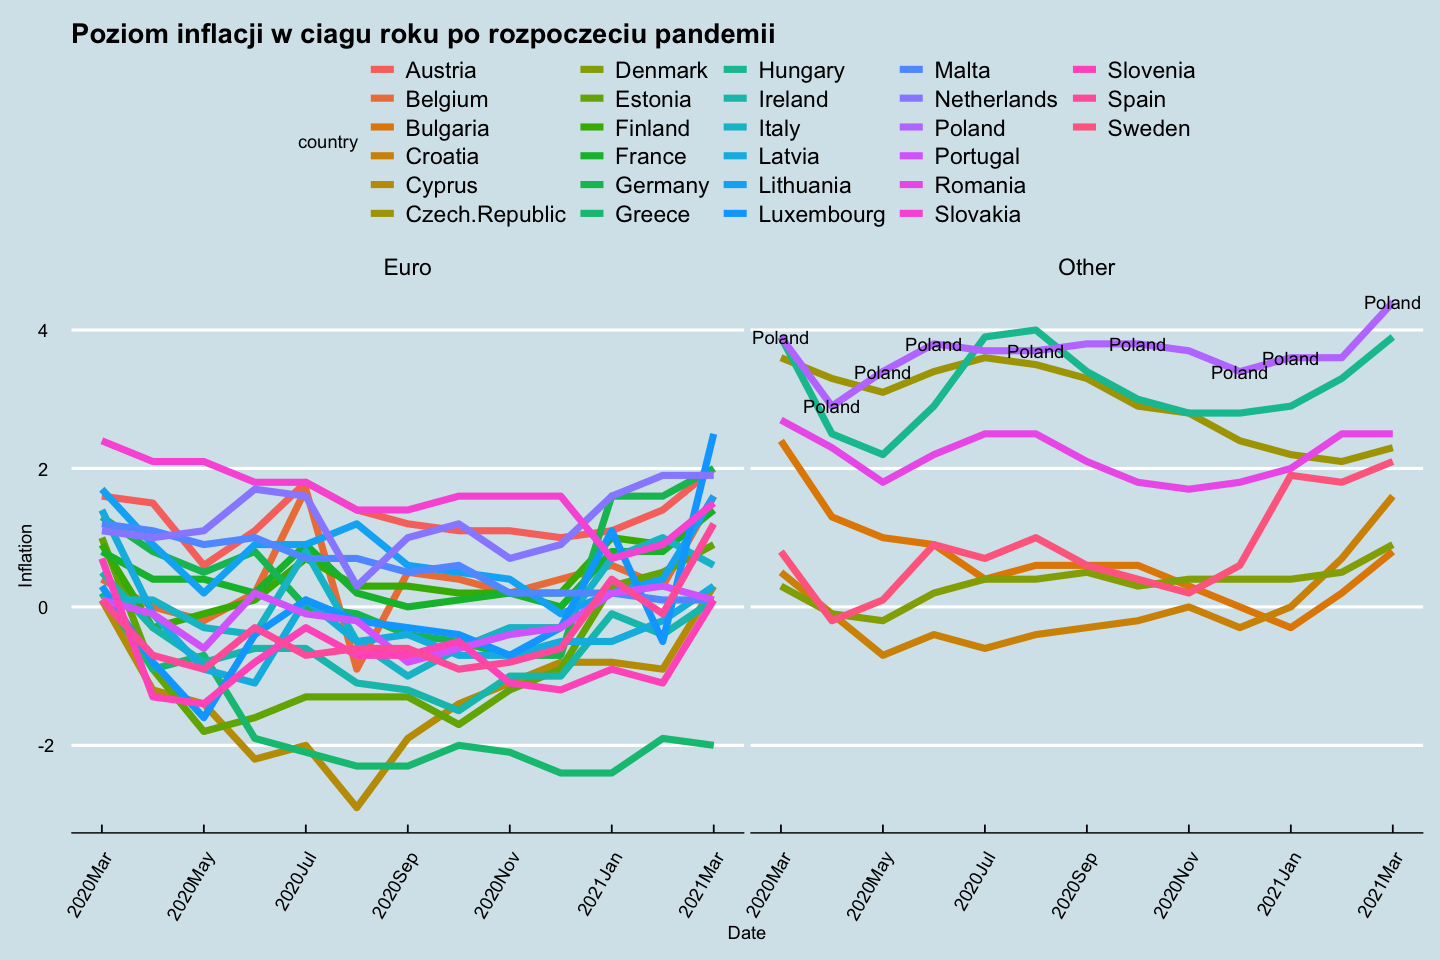

In [447]:
plot_inf(year_pandemic_inf) + 
ggtitle("Poziom inflacji w ciagu roku po rozpoczeciu pandemii")

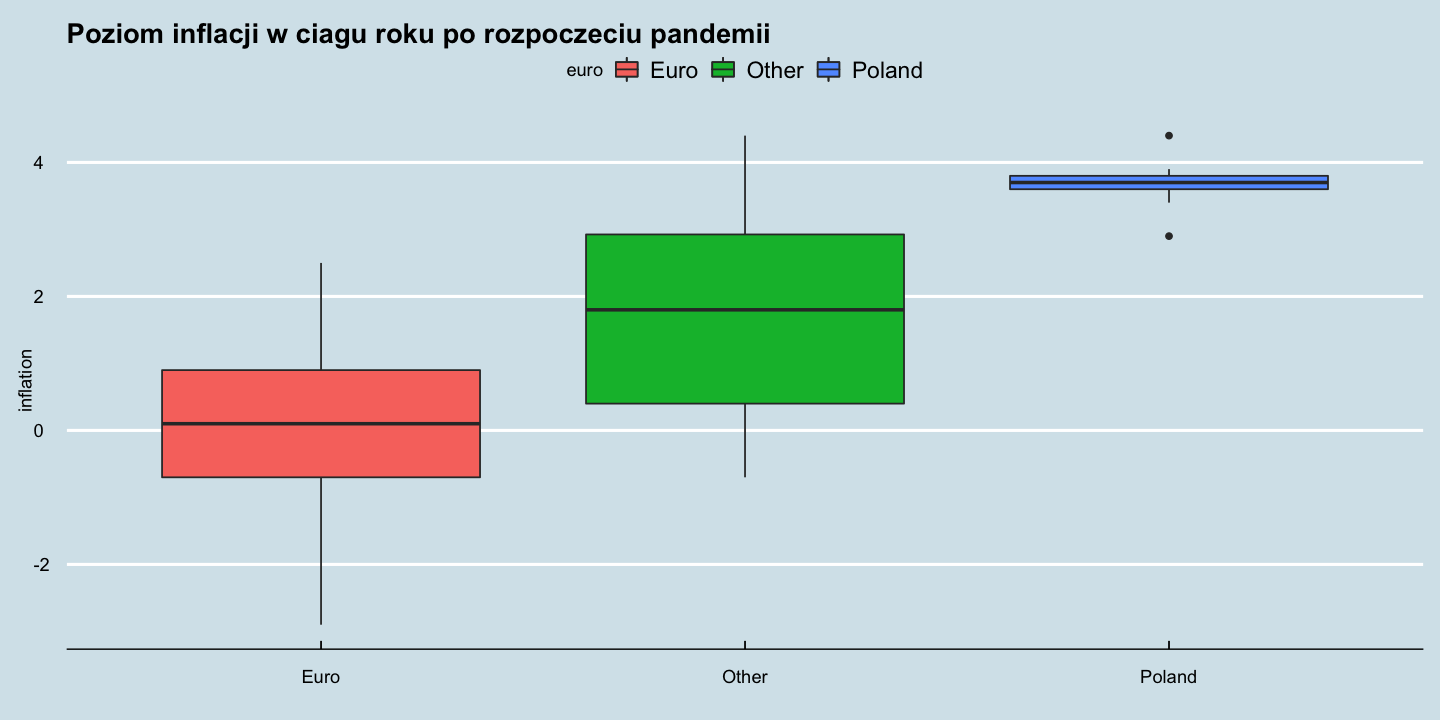

In [448]:
boxplot_inf(year_pandemic_inf)+ 
ggtitle("Poziom inflacji w ciagu roku po rozpoczeciu pandemii")

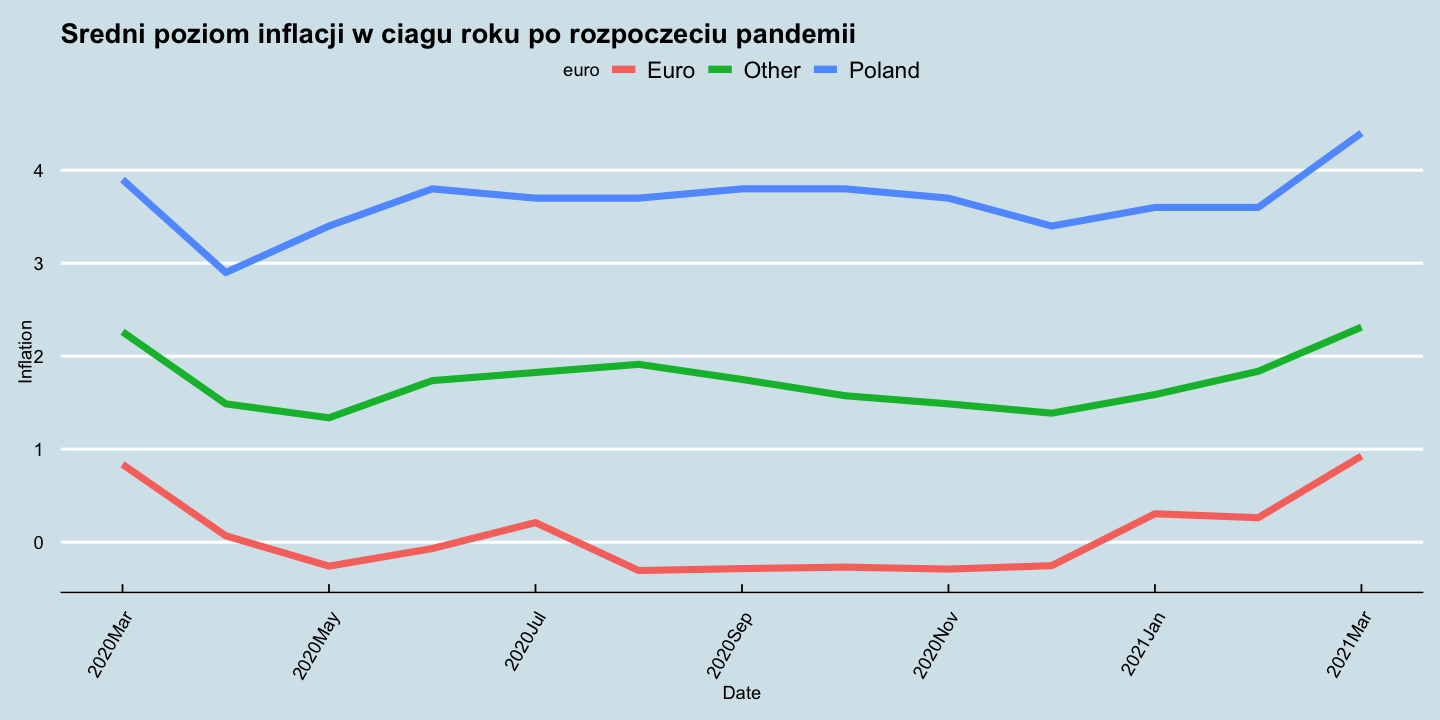

In [449]:
plot_inf_mean(year_pandemic_inf)+ 
ggtitle("Sredni poziom inflacji w ciagu roku po rozpoczeciu pandemii")

In [450]:
a <- pre_attack_inf |> filter(euro == 'Other') |> summary()
a[,3]

"Min.   : 0.800  " "1st Qu.: 2.700  " "Median : 4.450  " "Mean   : 4.730  " 
                                                         
"3rd Qu.: 6.325  " "Max.   :11.900  "                 NA

In [451]:
a <- pre_attack_inf |> filter(euro == 'Euro') |> summary()
a[,3]

"Min.   :-2.000  " "1st Qu.: 2.000  " "Median : 3.400  " "Mean   : 3.986  " 
                                                         
"3rd Qu.: 5.450  " "Max.   :15.600  "                 NA

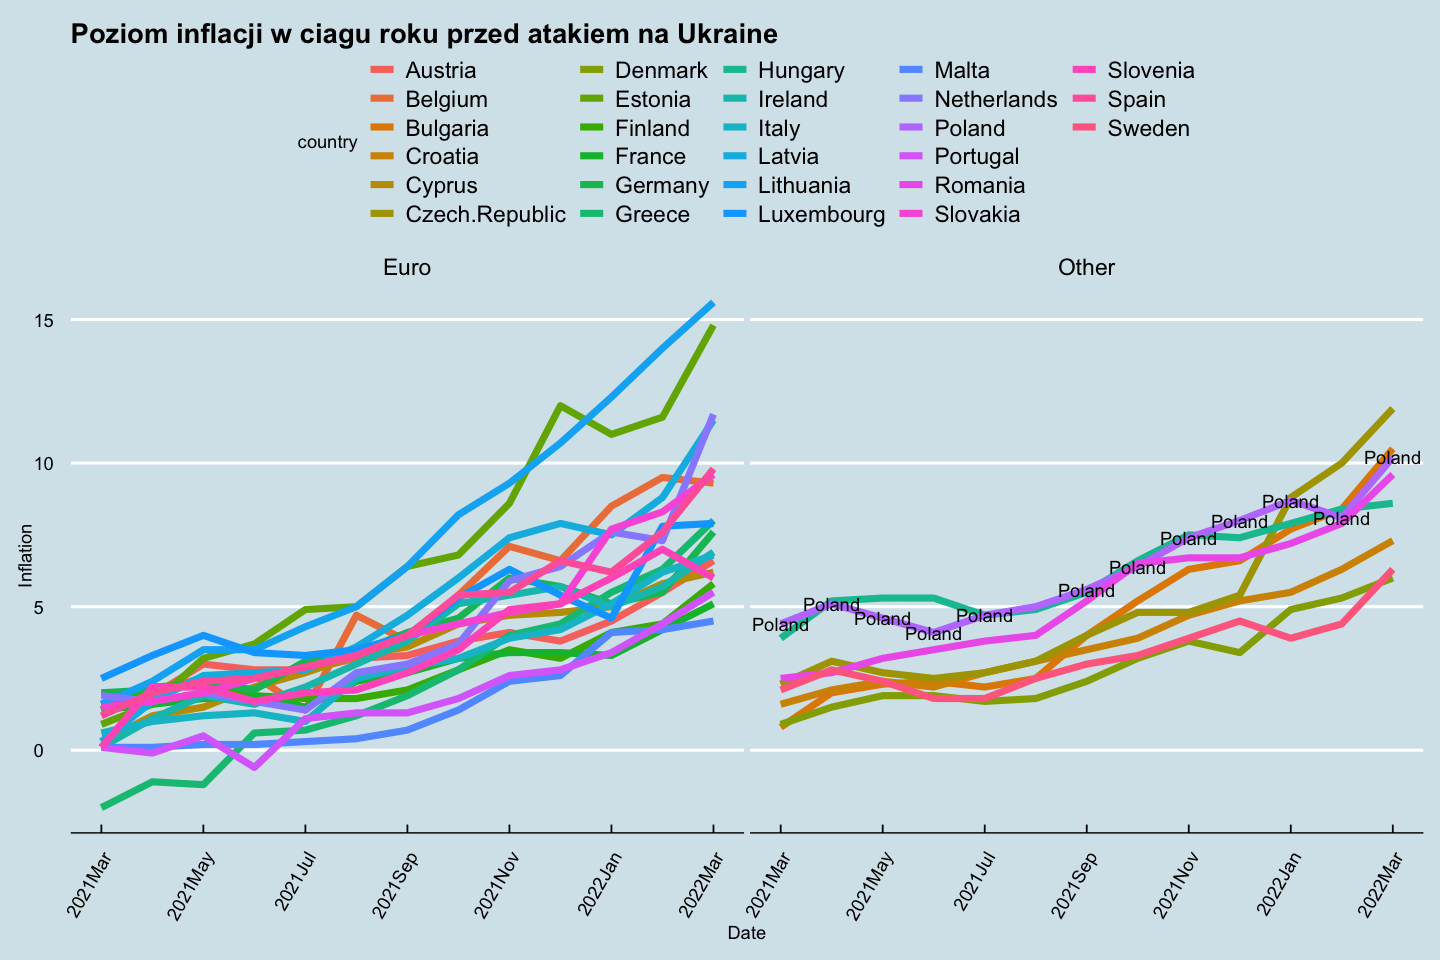

In [452]:
plot_inf(pre_attack_inf)+
ggtitle("Poziom inflacji w ciagu roku przed atakiem na Ukraine")

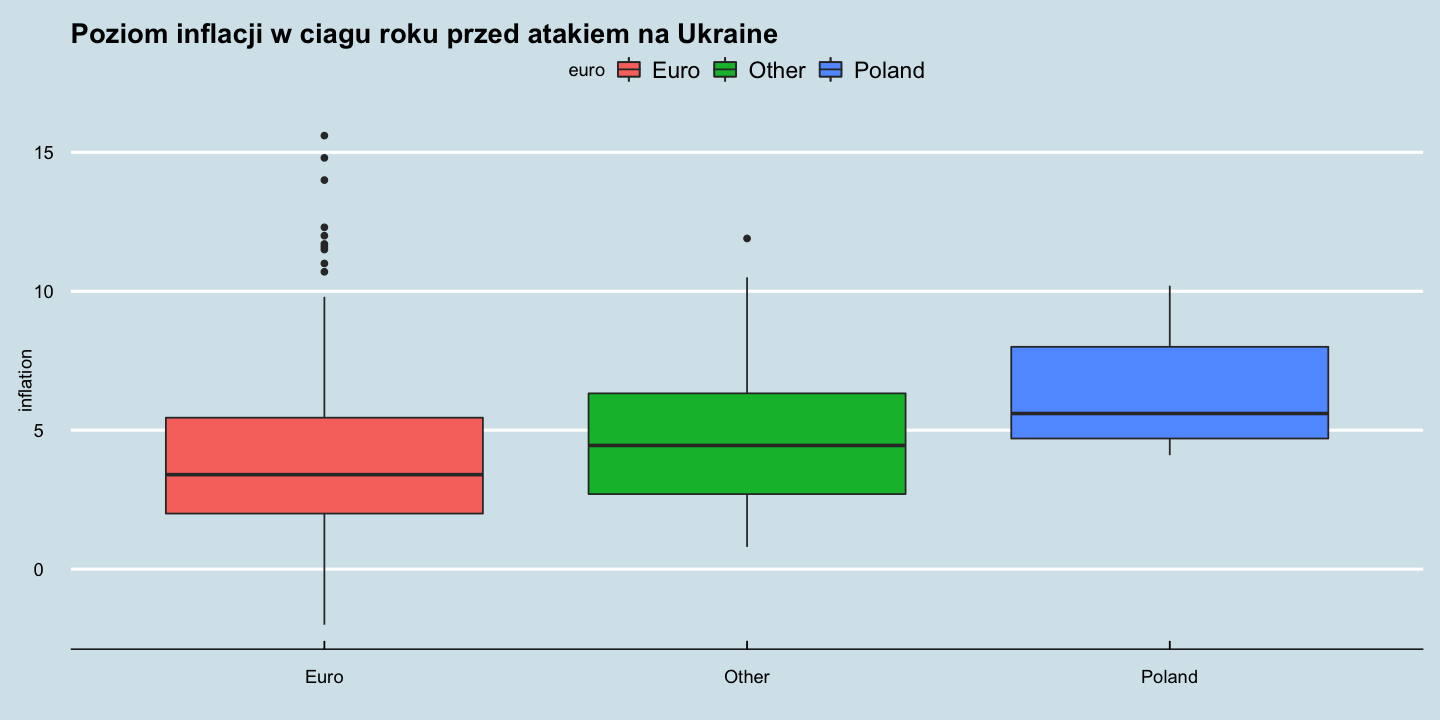

In [453]:
boxplot_inf(pre_attack_inf) +
ggtitle("Poziom inflacji w ciagu roku przed atakiem na Ukraine")

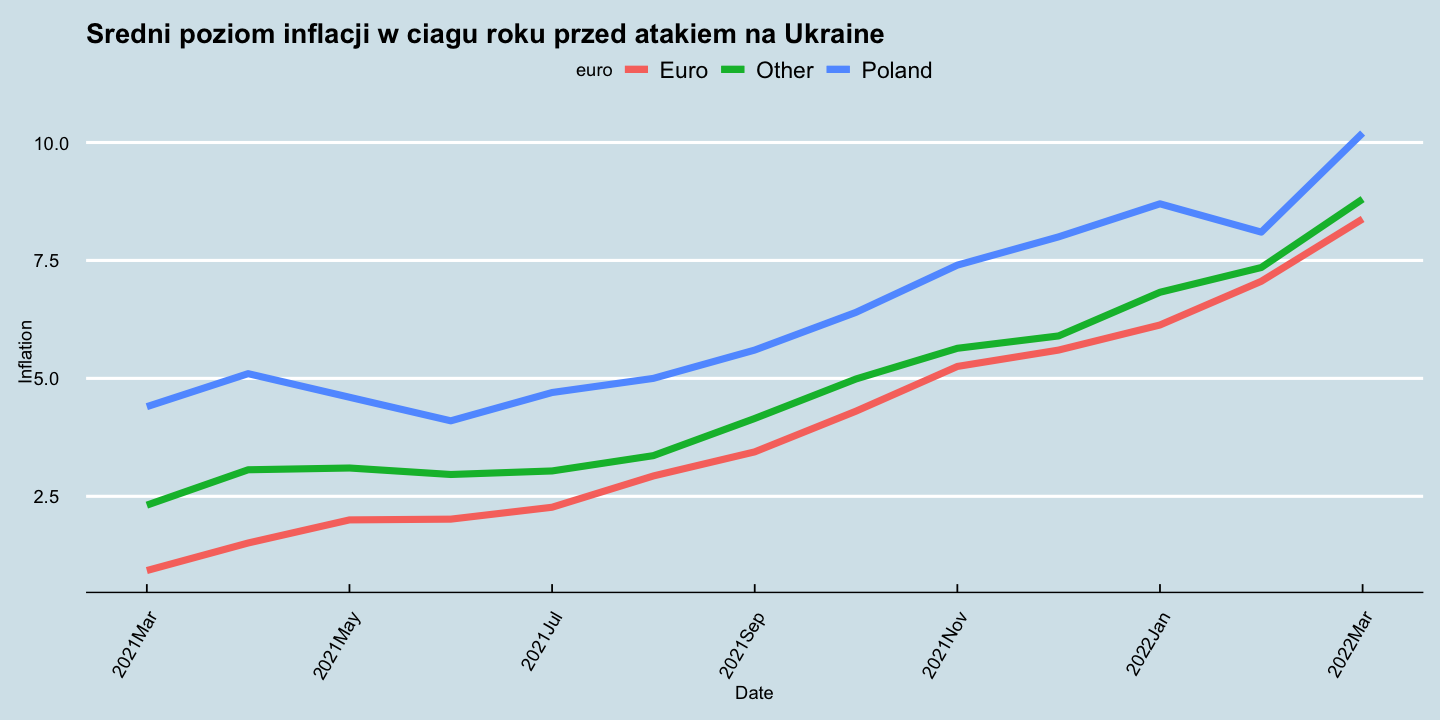

In [454]:
plot_inf_mean(pre_attack_inf) + 
ggtitle("Sredni poziom inflacji w ciagu roku przed atakiem na Ukraine")

In [455]:
a <- after_attack_inf |> filter(euro == 'Other') |> summary()
a[,3]

"Min.   : 6.00  " "1st Qu.: 9.60  " "Median :12.25  " "Mean   :12.09  " 
                                                      
"3rd Qu.:14.32  " "Max.   :20.70  "                NA

In [456]:
a <- after_attack_inf |> filter(euro == 'Euro') |> summary()
a[,3]

"Min.   : 4.50  " "1st Qu.: 7.90  " "Median : 9.30  " "Mean   :10.63  " 
                                                      
"3rd Qu.:11.50  " "Max.   :25.20  "                NA

In [471]:
after_attack_inf |> filter(Date == "2022Mar", euro == "Other")

Date,country,inflation,euro,isPoland
<fct>,<fct>,<dbl>,<fct>,<fct>
2022Mar,Sweden,6.3,Other,Rest
2022Mar,Romania,9.6,Other,Rest
2022Mar,Poland,10.2,Other,Poland
2022Mar,Hungary,8.6,Other,Rest
2022Mar,Croatia,7.3,Other,Rest
2022Mar,Denmark,6.0,Other,Rest
2022Mar,Czech.Republic,11.9,Other,Rest
2022Mar,Bulgaria,10.5,Other,Rest


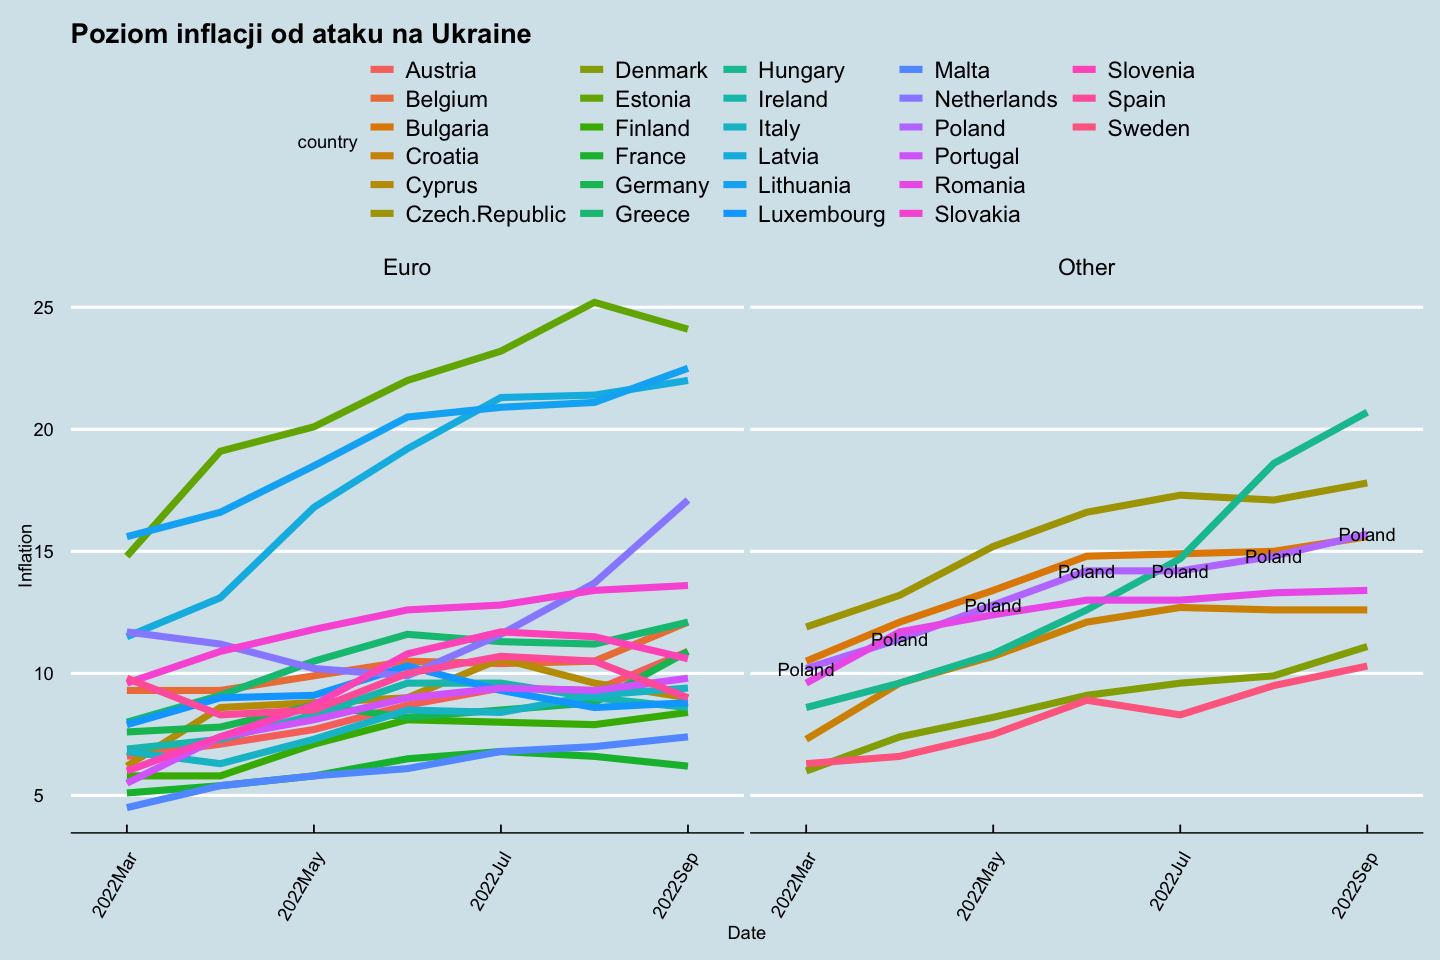

In [457]:
plot_inf(after_attack_inf) + 
ggtitle("Poziom inflacji od ataku na Ukraine")

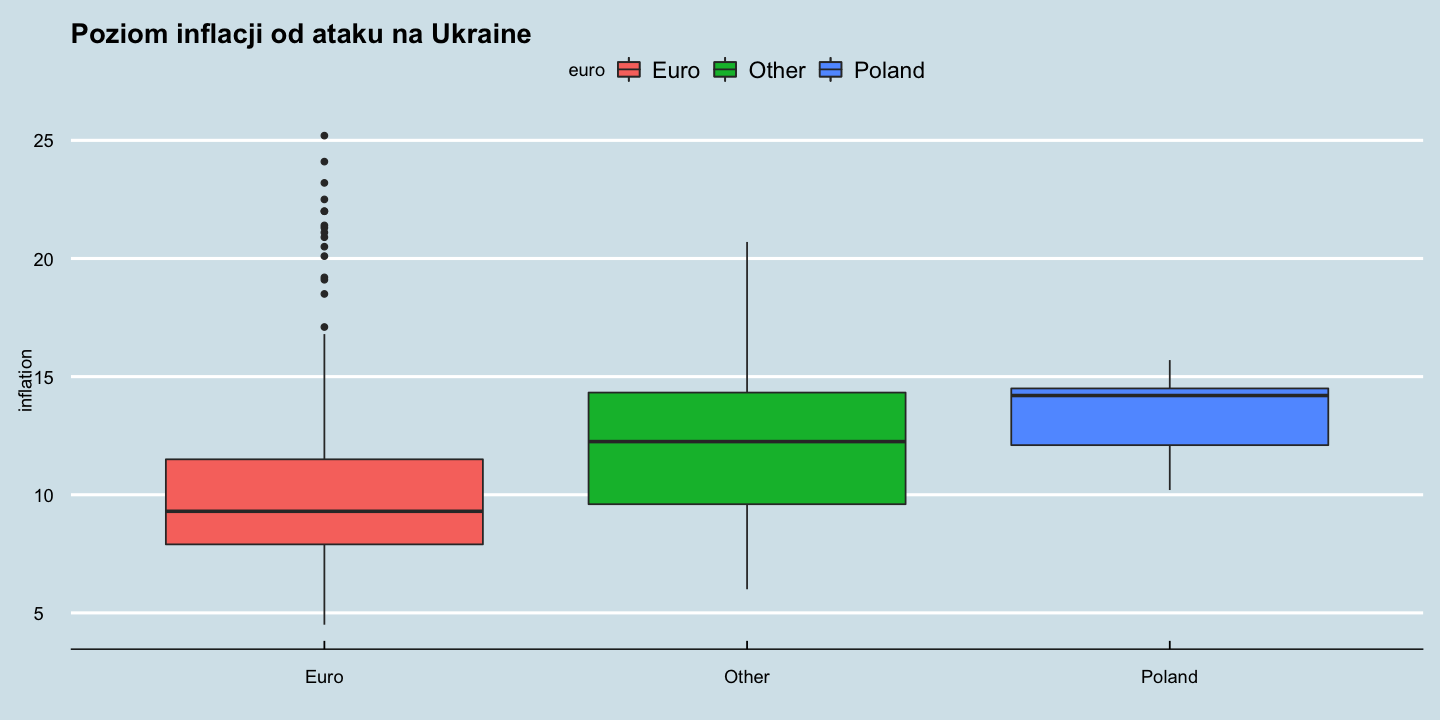

In [458]:
boxplot_inf(after_attack_inf) + 
ggtitle("Poziom inflacji od ataku na Ukraine")

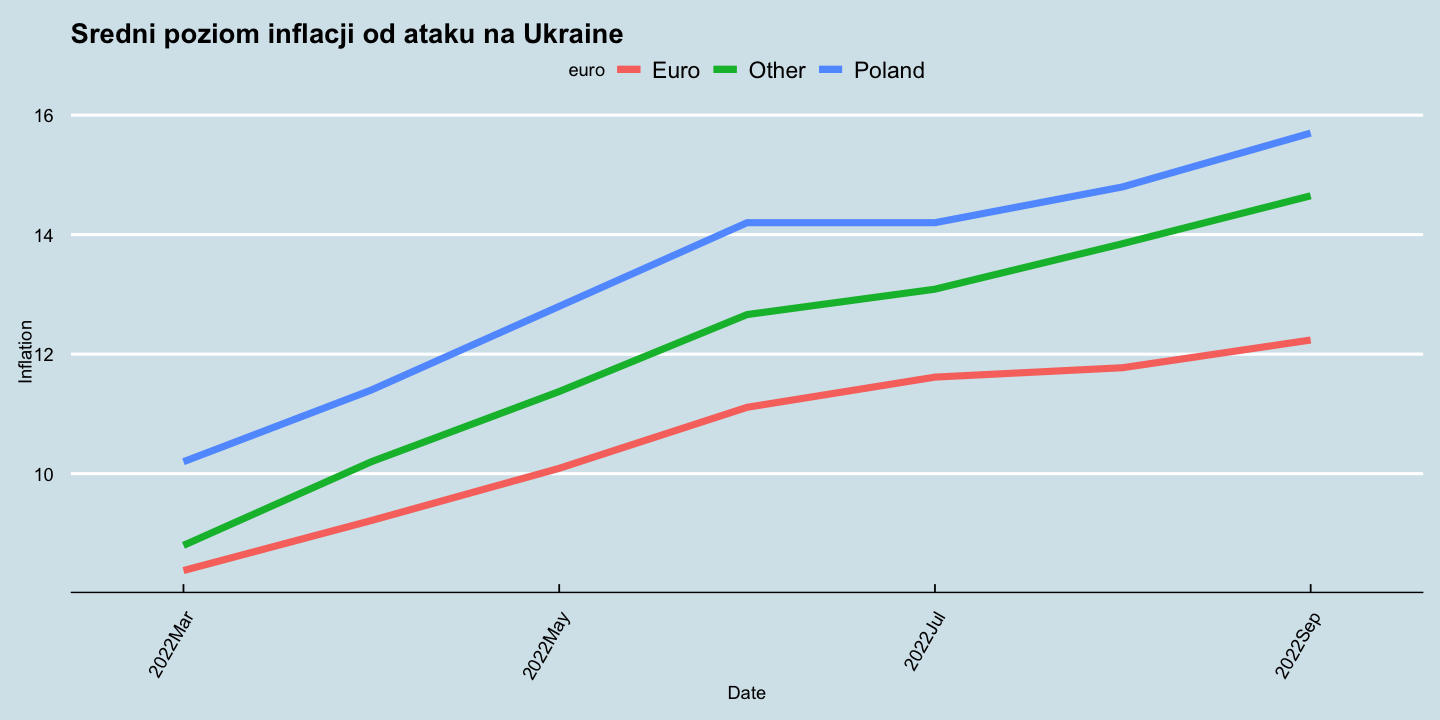

In [459]:
plot_inf_mean(after_attack_inf)+ 
ggtitle("Sredni poziom inflacji od ataku na Ukraine")

# Depozyty

In [181]:
eu_deposits_data <- eu_deposits_data|> mutate(country = as.factor(country))

In [182]:
#split data into time intervals
n = sum(eu_inflation$Date == pandemic)
pre_pandemic_dep<- eu_deposits_data[which(eu_deposits_data$Date == "2018Jan")[n]:which(eu_deposits_data$Date == pandemic)[1], ]
year_pandemic_dep <- eu_deposits_data[which(eu_deposits_data$Date == pandemic)[n]:which(eu_deposits_data$Date == year_pandemic)[1], ]
pre_attack_dep <- eu_deposits_data[which(eu_deposits_data$Date == year_pandemic)[n]:which(eu_deposits_data$Date == attack_on_ukraine)[1], ]
after_attack_dep <- eu_deposits_data[which(eu_deposits_data$Date == attack_on_ukraine)[n]:which(eu_deposits_data$Date == now)[1], ]

In [183]:
pre_pandemic_dep <- pre_pandemic_dep |> drop_na() |> mutate(inflation = pre_pandemic_inf[-c(1,2,3,4),]$inflation)
year_pandemic_dep <- year_pandemic_dep |> drop_na() |> mutate(inflation = year_pandemic_inf[-c(1,2,3,4),]$inflation)
pre_attack_dep <- pre_attack_dep |> drop_na() |> mutate(inflation = pre_attack_inf[-c(1,2,3,4),]$inflation)
after_attack_dep <- after_attack_dep |> drop_na() |> mutate(inflation = after_attack_inf[-c(1,2,3,4, 176),]$inflation)

In [228]:
dep_data <- function(data) {
    output <- data |> mutate(Date = factor(Date, levels = unique(Date)),
                                           deposits = as.numeric(deposits),
                                           coeff = (5+deposits)/(5+inflation),
                                           isPoland = as.factor(if_else(grepl('Poland',
                                                                              as.character(data$country),
                                                                              fixed=TRUE), 'Poland', 'All')))
}

In [230]:
pre_pandemic_dep <- dep_data(pre_pandemic_dep)
year_pandemic_dep <- dep_data(year_pandemic_dep)
pre_attack_dep <- dep_data(pre_attack_dep)
after_attack_dep <- dep_data(after_attack_dep)

In [369]:
boxplot_dep <- function(data) {
    options(repr.plot.width=12, repr.plot.height=6)
    data |>drop_na() |> 
      ggplot(aes(isPoland, coeff, fill=isPoland)) +
      geom_boxplot() +
      xlab("") + ylab("inflation") +
theme_economist() + scale_fill_brewer(palette="Set2") + 
theme(legend.position = "right", legend.key.size = unit(1.5, "cm"), legend.title = element_text(size=15))
}

In [232]:
a <- pre_pandemic_dep |> filter(isPoland == 'All') |> summary()
a[,3]

"Min.   :-0.4700  " "1st Qu.: 0.1400  " "Median : 0.2400  " "Mean   : 0.4567  " 
                                                            
"3rd Qu.: 0.6800  " "Max.   : 1.9800  "       "NA's   :6  "

In [233]:
a <- pre_pandemic_dep |> filter(isPoland == 'Poland') |> summary()
a[,3]

"Min.   :1.190  " "1st Qu.:1.325  " "Median :1.540  " "Mean   :1.502  " 
                                                      
"3rd Qu.:1.605  " "Max.   :1.830  "                NA

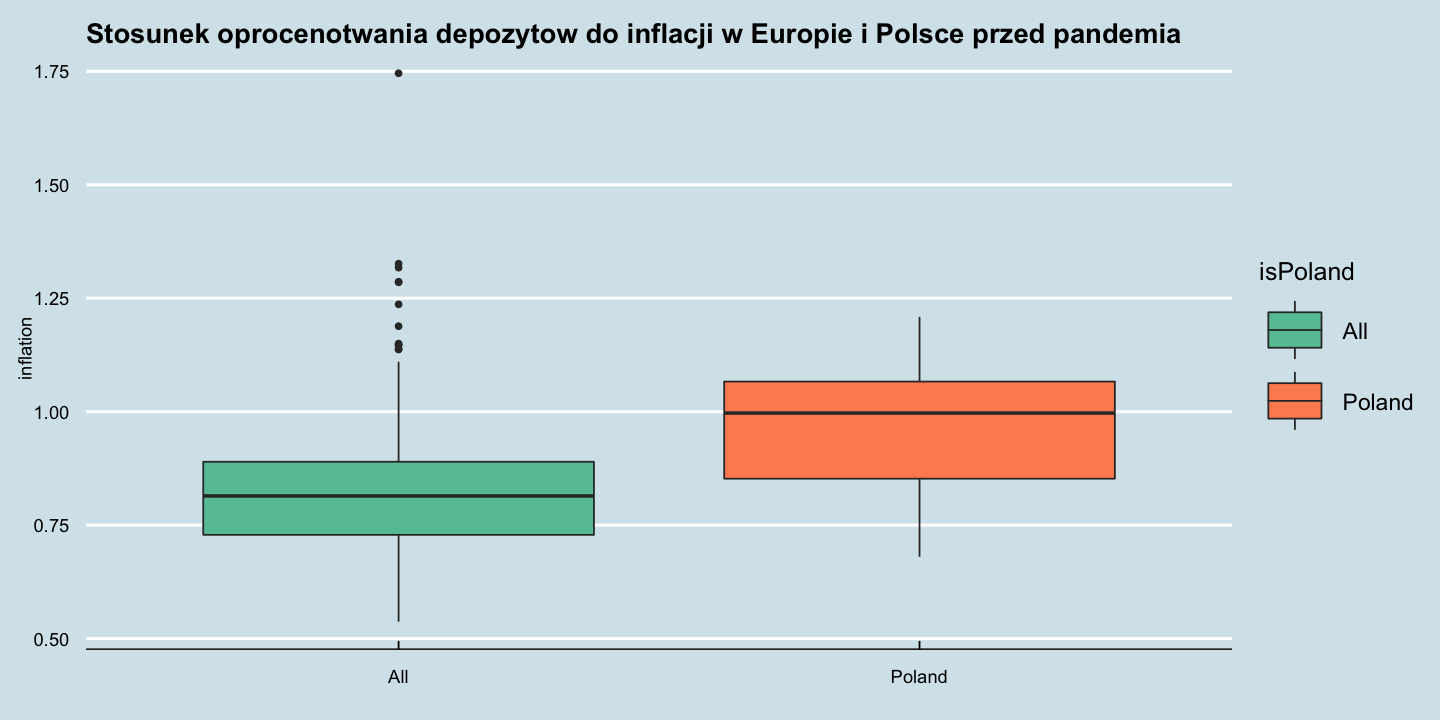

In [370]:
boxplot_dep(pre_pandemic_dep) +
ggtitle("Stosunek oprocenotwania depozytow do inflacji w Europie i Polsce przed pandemia")

In [222]:
a <- year_pandemic_dep |> filter(isPoland == 'All') |> summary()
a[,3]

"Min.   :-0.3400  " "1st Qu.: 0.0800  " "Median : 0.1800  " "Mean   : 0.3189  " 
                                                            
"3rd Qu.: 0.5075  " "Max.   : 1.7100  "                  NA

In [223]:
a <- year_pandemic_dep |> filter(isPoland == 'Poland') |> summary()
a[,3]

"Min.   :0.2000  " "1st Qu.:0.3400  " "Median :0.4500  " "Mean   :0.5062  " 
                                                         
"3rd Qu.:0.5100  " "Max.   :1.2000  "                 NA

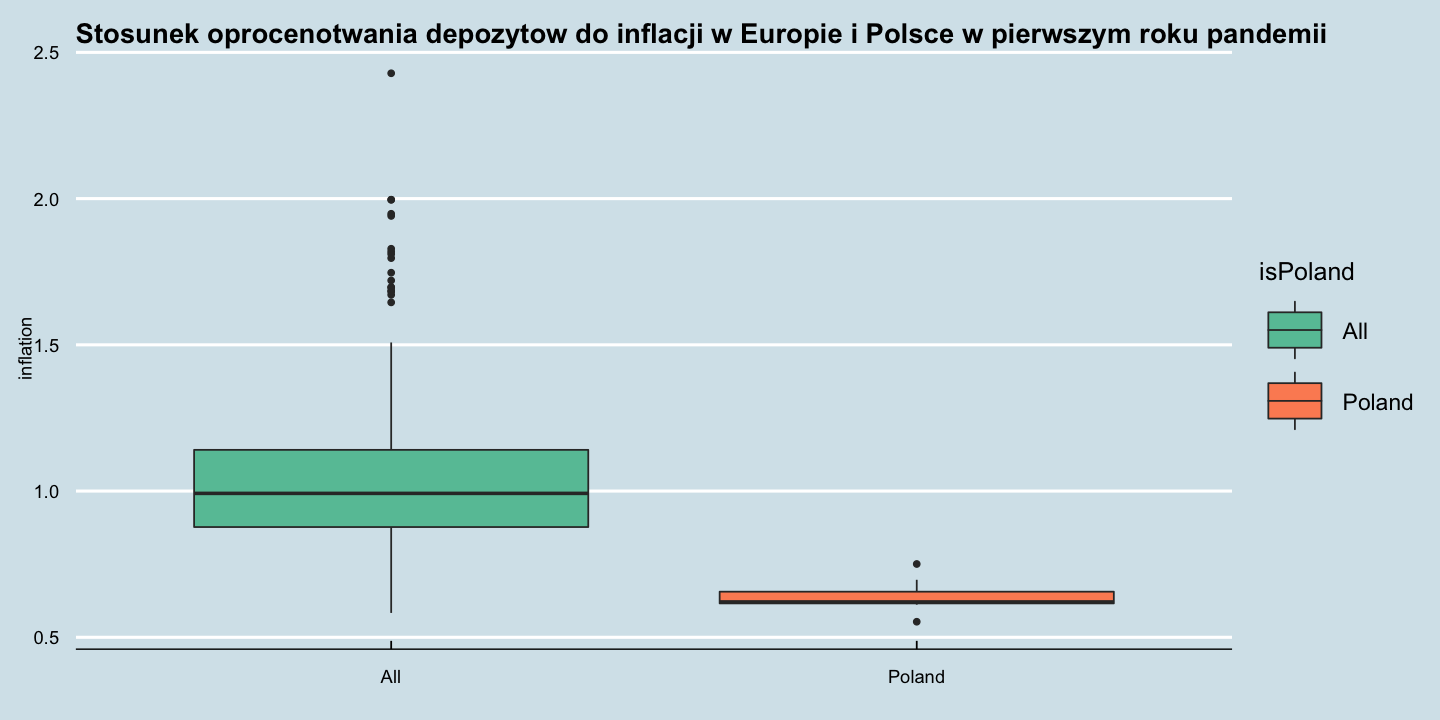

In [371]:
boxplot_dep(year_pandemic_dep) +
ggtitle("Stosunek oprocenotwania depozytow do inflacji w Europie i Polsce w pierwszym roku pandemii")

In [224]:
a <- pre_attack_dep |> filter(isPoland == 'All') |> summary()
a[,3]

"Min.   :-0.5900  " "1st Qu.: 0.0600  " "Median : 0.1400  " "Mean   : 0.3203  " 
                                                            
"3rd Qu.: 0.4275  " "Max.   : 3.5100  "                  NA

In [225]:
a <- pre_attack_dep|> filter(isPoland == 'Poland') |> summary()
a[,3]

"Min.   :0.1900  " "1st Qu.:0.2200  " "Median :0.2900  " "Mean   :0.5162  " 
                                                         
"3rd Qu.:0.6900  " "Max.   :1.4800  "                 NA

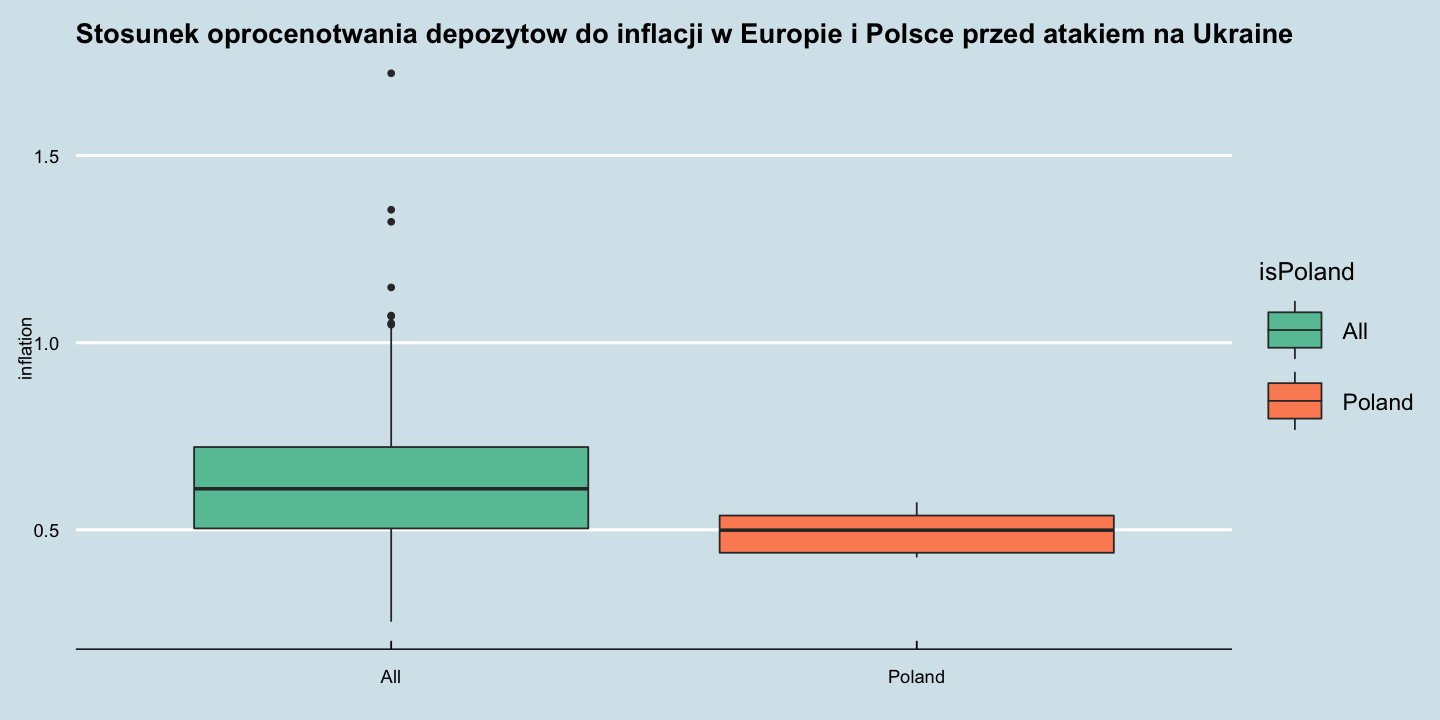

In [373]:
boxplot_dep(pre_attack_dep) +
ggtitle("Stosunek oprocenotwania depozytow do inflacji w Europie i Polsce przed atakiem na Ukraine")

In [226]:
a <- after_attack_dep|> filter(isPoland == 'All') |> summary()
a[,3]

"Min.   :-0.5400  " "1st Qu.: 0.0700  " "Median : 0.2100  " "Mean   : 0.8248  " 
                                                            
"3rd Qu.: 0.6400  " "Max.   : 8.4200  "                  NA

In [227]:
a <- after_attack_dep|> filter(isPoland == 'Poland') |> summary()
a[,3]

"Min.   :1.480  " "1st Qu.:2.705  " "Median :4.500  " "Mean   :3.843  " 
                                                      
"3rd Qu.:5.035  " "Max.   :5.440  "                NA

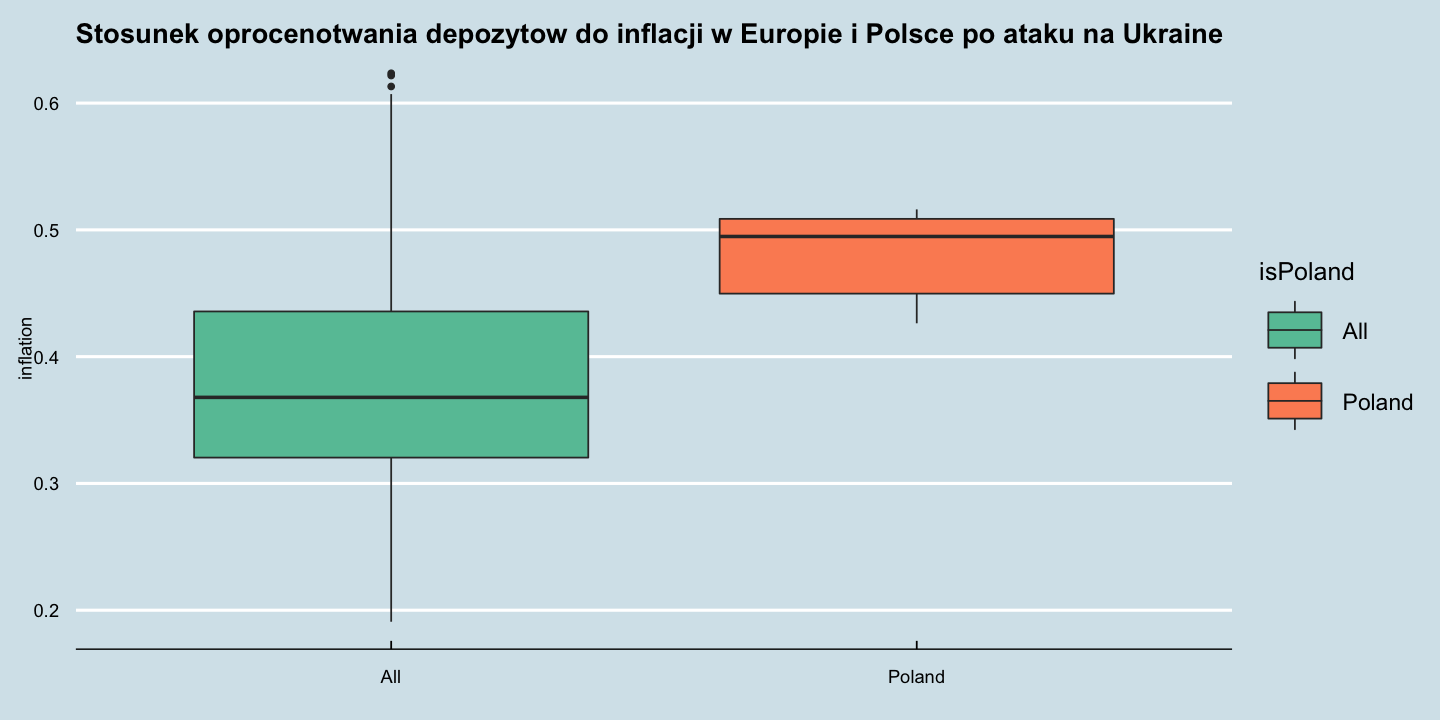

In [374]:
boxplot_dep(after_attack_dep) +
ggtitle("Stosunek oprocenotwania depozytow do inflacji w Europie i Polsce po ataku na Ukraine")

# ZADANIE 3

In [138]:
picked_countries <- c("Poland", "Germany", "Sweden")
eu_inflation_data_sub <- eu_inflation_data |> filter(country %in% picked_countries, Date > '1999Z')
eu_inflation_data_sub <- eu_inflation_data_sub |> mutate(country = as.factor(country),
                                                         inflation = as.numeric(inflation))
n = nrow(eu_inflation_data_sub[-c(1,2,3),])
eu_inflation_data_sub <- eu_inflation_data_sub[-c(1,2,3),] |> mutate(diff = (inflation - append(inflation[-c(1, 2, 3)], c(0, 0, 0))))
eu_inflation_data_sub <- eu_inflation_data_sub[-c(n, n-1, n-2),]
eu_inflation_data_sub <- eu_inflation_data_sub[nrow(eu_inflation_data_sub):1,] |> mutate(Date = factor(Date,
                                                                                                       levels = unique(Date)))
head(eu_inflation_data_sub)

Date,country,inflation,diff
<fct>,<fct>,<dbl>,<dbl>
2000Feb,Sweden,1.4,0.4
2000Feb,Poland,10.5,0.4
2000Feb,Germany,1.7,0.0
2000Mar,Sweden,1.3,-0.1
2000Mar,Poland,10.3,-0.2
2000Mar,Germany,1.4,-0.3


In [361]:
histogram_inf_diff <- function(country_) {
    options(repr.plot.width=10, repr.plot.height=6)
    data_by_country <- eu_inflation_data_sub |> filter(country == country_)
    plot <- data_by_country |> ggplot(aes(diff, group=1, label = country_)) +
    geom_histogram(aes(y = ..density..),binwidth=0.1, color = "white", fill = "cornflowerblue")+
    stat_function(fun = dnorm, args = list(mean=mean(data_by_country$diff), sd=sd(data_by_country$diff)),
                  color='red', lwd=2, lty='dashed') +
    theme_economist() + labs(subtitle=paste0("Rozklad normalny N(",round(mean(data_by_country$diff), 2),", ",round(sd(data_by_country$diff),2),")"))

return (plot)
}

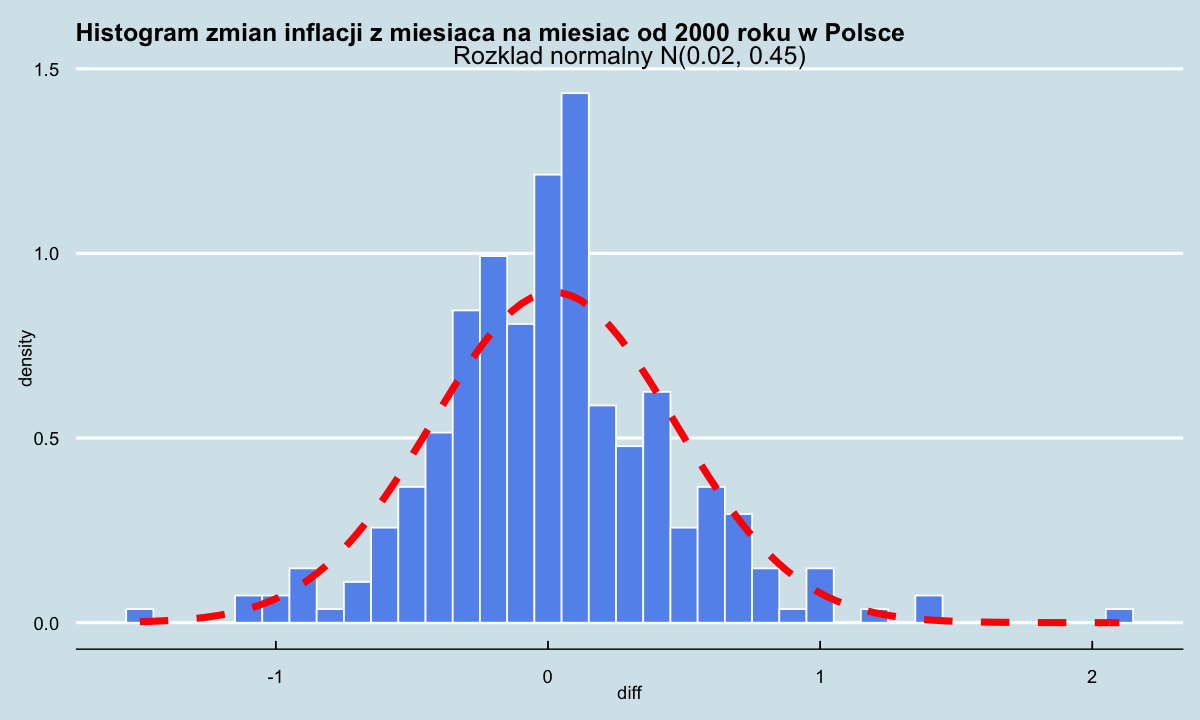

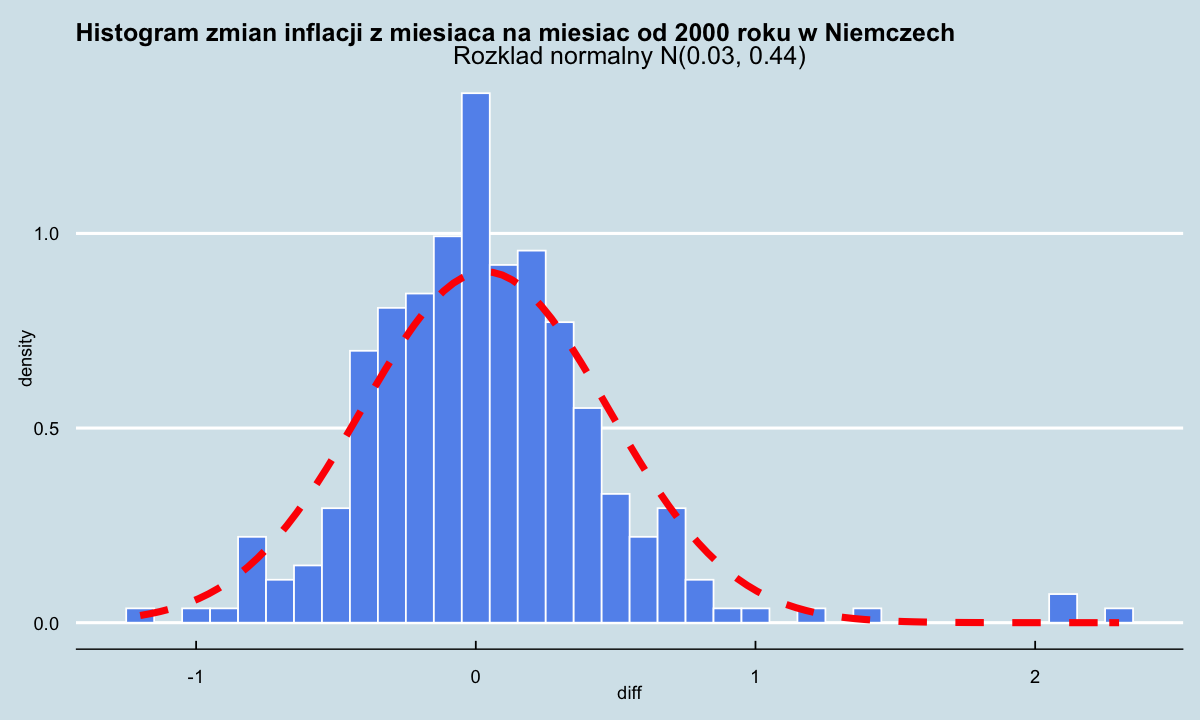

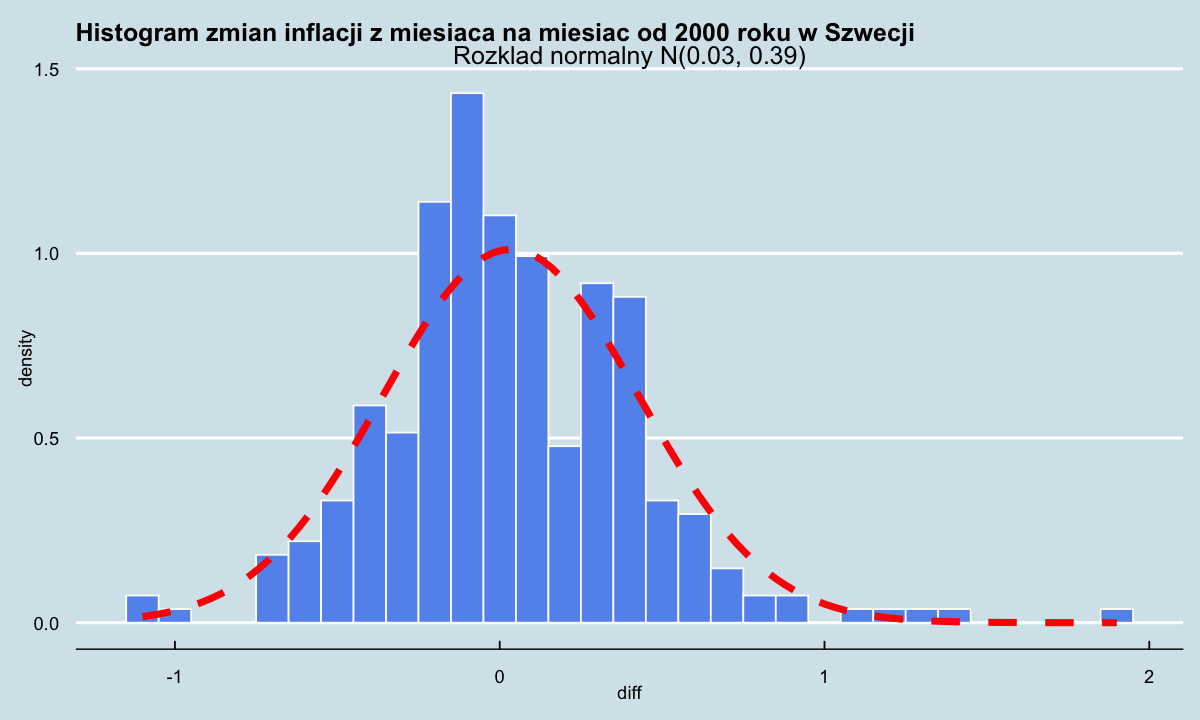

In [365]:
histogram_inf_diff("Poland") + ggtitle("Histogram zmian inflacji z miesiaca na miesiac od 2000 roku w Polsce") +
theme(plot.title = element_text(size = 15), plot.subtitle = element_text(size = 15))
histogram_inf_diff("Germany") + ggtitle("Histogram zmian inflacji z miesiaca na miesiac od 2000 roku w Niemczech") +
theme(plot.title = element_text(size = 15), plot.subtitle = element_text(size = 15))
histogram_inf_diff("Sweden") + ggtitle("Histogram zmian inflacji z miesiaca na miesiac od 2000 roku w Szwecji") + 
theme(plot.title = element_text(size = 15), plot.subtitle = element_text(size = 15))